In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('fraud_oracle.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
df=df.drop(['Month','WeekOfMonth','DayOfWeek','PolicyNumber','RepNumber','Deductible'],axis=1)

In [5]:
nominal=df[['Make','DayOfWeekClaimed','MonthClaimed','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

In [6]:
# Get dummy variables
dummy = pd.get_dummies(nominal)

print(dummy)

       Make_Accura  Make_BMW  Make_Chevrolet  Make_Dodge  Make_Ferrari  \
0                0         0               0           0             0   
1                0         0               0           0             0   
2                0         0               0           0             0   
3                0         0               0           0             0   
4                0         0               0           0             0   
...            ...       ...             ...         ...           ...   
15415            0         0               0           0             0   
15416            0         0               0           0             0   
15417            0         0               0           0             0   
15418            0         0               0           0             0   
15419            0         0               0           0             0   

       Make_Ford  Make_Honda  Make_Jaguar  Make_Lexus  Make_Mazda  ...  \
0              0           1         

In [7]:
df=df.drop(nominal,axis=1)

In [8]:
df.isnull().sum()

AccidentArea            0
WeekOfMonthClaimed      0
Sex                     0
Age                     0
Fault                   0
VehiclePrice            0
FraudFound_P            0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
dtype: int64

In [9]:
df=pd.concat([df,dummy],axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to object columns
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Convert boolean columns to int (True: 1, False: 0)
bool_cols = df.select_dtypes(include=['bool']).columns
for col in bool_cols:
    df[col] = df[col].astype(int)

print(df)

       AccidentArea  WeekOfMonthClaimed  Sex  Age  Fault  VehiclePrice  \
0                 1                   1    0   21      0             5   
1                 1                   4    1   34      0             5   
2                 1                   2    1   47      0             5   
3                 0                   1    1   65      1             0   
4                 1                   2    0   27      1             5   
...             ...                 ...  ...  ...    ...           ...   
15415             1                   5    1   35      0             0   
15416             1                   1    1   30      0             1   
15417             0                   1    1   24      0             0   
15418             1                   2    0   34      1             0   
15419             1                   3    1   21      0             0   

       FraudFound_P  DriverRating  Days_Policy_Accident  Days_Policy_Claim  \
0                 0             1

In [12]:
X=df.drop(['FraudFound_P'],axis=1)

In [13]:
y=df['FraudFound_P']

In [15]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X)
X=scaler.transform(X)

In [46]:
X

array([[ 0.34001881, -1.34540805, -2.31773614, ..., -0.63680739,
        -0.79395581,  1.44168609],
       [ 0.34001881,  1.03729462,  0.4314555 , ..., -0.63680739,
         1.25951594, -0.69363227],
       [ 0.34001881, -0.55117383,  0.4314555 , ..., -0.63680739,
         1.25951594, -0.69363227],
       ...,
       [-2.94101376, -1.34540805,  0.4314555 , ..., -0.63680739,
         1.25951594, -0.69363227],
       [ 0.34001881, -0.55117383, -2.31773614, ...,  1.57033353,
        -0.79395581, -0.69363227],
       [ 0.34001881,  0.24306039,  0.4314555 , ..., -0.63680739,
         1.25951594, -0.69363227]])

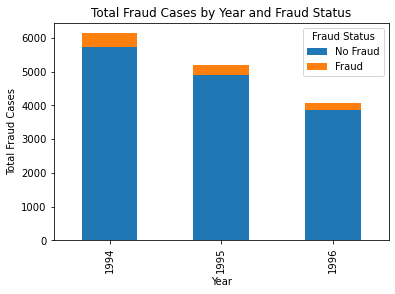

In [47]:
fraud_by_year = df.groupby(['Year', 'FraudFound_P']).size().unstack(fill_value=0)

# Plotting
fraud_by_year.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Fraud Cases')
plt.title('Total Fraud Cases by Year and Fraud Status')
plt.legend(title='Fraud Status', labels=['No Fraud', 'Fraud'])
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.935473411154345


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3082
           1       0.00      0.00      0.00         2

    accuracy                           0.94      3084
   macro avg       0.50      0.47      0.48      3084
weighted avg       1.00      0.94      0.97      3084



In [51]:
print(confusion_matrix(y_pred,y_test))

[[2885  197]
 [   2    0]]


In [52]:
from imblearn.under_sampling import RandomUnderSampler

In [53]:
rus=RandomUnderSampler(sampling_strategy=1)
X_res,y_res=rus.fit_resample(X,y)


In [54]:
y_res.value_counts()

0    923
1    923
Name: FraudFound_P, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7702702702702703


In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       131
           1       0.91      0.72      0.80       239

    accuracy                           0.77       370
   macro avg       0.77      0.79      0.76       370
weighted avg       0.81      0.77      0.78       370



In [58]:
print(confusion_matrix(y_pred,y_test))

[[114  17]
 [ 68 171]]


In [59]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define your decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 7, 9],
    "min_samples_split": [5, 10, 15, 20, 50, 100],
    "min_samples_leaf": [5, 10, 15, 20, 50, 80, 100]
}

# Perform grid search using GridSearchCV
grid_search = RandomizedSearchCV(estimator=dt,param_distributions=params,cv=5,n_jobs=2)

# Fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_dt = grid_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_dt.predict(X_test)


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.57      0.72       182
           1       0.70      0.98      0.82       188

    accuracy                           0.78       370
   macro avg       0.83      0.78      0.77       370
weighted avg       0.83      0.78      0.77       370



In [61]:
print(confusion_matrix(y_test, y_pred))

[[104  78]
 [  4 184]]


In [62]:
# using RandomizedsearchCV for hyperparameter tuning
params_rf={"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[20,50,100,200],
          "min_samples_leaf":[2,5,20,10],
          "n_estimators":[50,100,150,200],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.7,.75,.8,.9]}

# Perform grid search using GridSearchCV
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,n_jobs=2)

# Fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_rf.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       182
           1       0.72      0.93      0.81       188

    accuracy                           0.78       370
   macro avg       0.81      0.78      0.77       370
weighted avg       0.81      0.78      0.78       370



In [64]:
print(confusion_matrix(y_test, y_pred))

[[114  68]
 [ 13 175]]


In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBClassifier

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for hyperparameter tuning
params = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),           # Maximum tree depth
    'min_child_weight': randint(1, 10),    # Minimum sum of instance weight (hessian) needed in a child
    'subsample': uniform(0.6, 0.4),        # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),              # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': uniform(0, 0.5),          # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5)          # L2 regularization term on weights
}

# Define XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Perform randomized search using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params,
                                   n_iter=100, cv=5, random_state=0, n_jobs=-1)

# Fit the randomized search object to your training data
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_xgb = random_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_xgb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[105  77]
 [  4 184]]


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72       182
           1       0.70      0.98      0.82       188

    accuracy                           0.78       370
   macro avg       0.83      0.78      0.77       370
weighted avg       0.83      0.78      0.77       370



In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE(random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [73]:
y_resampled.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7630625969994826


In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1832 1067]
 [ 307 2593]]


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      2899
           1       0.71      0.89      0.79      2900

    accuracy                           0.76      5799
   macro avg       0.78      0.76      0.76      5799
weighted avg       0.78      0.76      0.76      5799



In [77]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define your decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 7, 9],
    "min_samples_split": [5, 10, 15, 20, 50, 100],
    "min_samples_leaf": [5, 10, 15, 20, 50, 80, 100]
}

# Perform grid search using GridSearchCV
grid_search = RandomizedSearchCV(estimator=dt,param_distributions=params,cv=5,n_jobs=2)

# Fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_dt = grid_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_dt.predict(X_test)


In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2675  224]
 [ 414 2486]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2899
           1       0.92      0.86      0.89      2900

    accuracy                           0.89      5799
   macro avg       0.89      0.89      0.89      5799
weighted avg       0.89      0.89      0.89      5799



In [80]:
# using RandomizedsearchCV for hyperparameter tuning
params_rf={"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[20,50,100,200],
          "min_samples_leaf":[2,5,20,10],
          "n_estimators":[50,100,150,200],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.7,.75,.8,.9]}

# Perform grid search using GridSearchCV
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,n_jobs=2)

# Fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_rf.predict(X_test)

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2730  169]
 [ 138 2762]]


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2899
           1       0.94      0.95      0.95      2900

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for hyperparameter tuning
params = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),           # Maximum tree depth
    'min_child_weight': randint(1, 10),    # Minimum sum of instance weight (hessian) needed in a child
    'subsample': uniform(0.6, 0.4),        # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),              # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': uniform(0, 0.5),          # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5)          # L2 regularization term on weights
}

# Define XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Perform randomized search using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params,
                                   n_iter=100, cv=5, random_state=0, n_jobs=-1)

# Fit the randomized search object to your training data
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_xgb = random_search.best_estimator_

# Use the best estimator to make predictions on your test data
y_pred = best_xgb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2880   19]
 [ 159 2741]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2899
           1       0.99      0.95      0.97      2900

    accuracy                           0.97      5799
   macro avg       0.97      0.97      0.97      5799
weighted avg       0.97      0.97      0.97      5799

